In [1]:
import pandas as pd
import numpy as np

import hdbscan

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt

from repsys import Dataset

In [2]:
class MovieLens(Dataset):
    def name(self):
        return "movielens"

In [3]:
dataset = MovieLens()
dataset.load_dataset()

In [4]:
svd = TruncatedSVD(n_components=50, random_state=42, algorithm="arpack")

In [5]:
reduced_data = svd.fit_transform(dataset.vad_data_tr)

In [16]:
tsne = TSNE(perplexity=30, random_state=42)

In [17]:
X_embedded = tsne.fit_transform(reduced_data)

/Users/jean/opt/miniconda3/envs/jupyter/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/jean/opt/miniconda3/envs/jupyter/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [18]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=12)

In [19]:
clusterer.fit(X_embedded)

HDBSCAN(min_cluster_size=12)

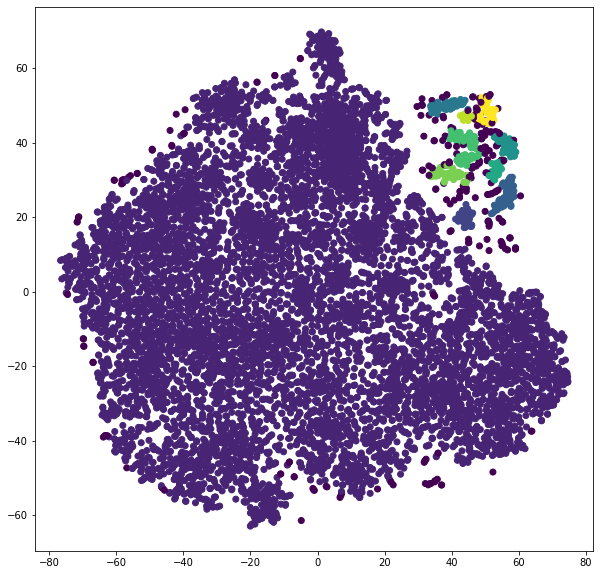

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(x=X_embedded[:, 0], y=X_embedded[:, 1], c=clusterer.labels_)
plt.show()

In [82]:
comedies = dataset.items['subtitle'].str.contains('Horror').index

In [83]:
dataset.vad_data_tr[:, comedies].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])